### **Please submit the different parts of Module 4 in separate notebooks.**

# Module 4, Part 2

Please complete this assignment in a Colab.  

Please submit all parts of the Module 4 assignment as separate notebooks in the Canvas assignment for Module 4 ("Module 4 Assignment").

### **Please submit the different parts of Module 4 in separate notebooks.**

# Section 0: Setup & Initialization 

In [1]:
# importing required libraries
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# creating features for k means clustering; default number of features is 2
# data belonging to each cluster is labeled with 0, 1...k where k is the number of clusters
features, true_labels = make_blobs(n_samples = 450, centers = 3, cluster_std = 1.5, random_state = 100)

In [3]:
# converting the features to dataframe format and printing them
features = pd.DataFrame(features)
features.head(5)

,0,1
0,-1.797752,6.544419
1,-7.524641,-6.537101
2,1.503285,-4.671888
3,-1.013041,6.345778
4,1.473496,-7.259864


In [4]:
# printing the true labels (this is the target variable/class assignment ground truth)
true_labels

array([1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2,

## Section 1: Kmeans Clustering

### 1\. Apply standard scaling to the data & convert to data frame format

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features)

### 2\. Create a scatter plot of the data, where each cluster is plotted in a different color

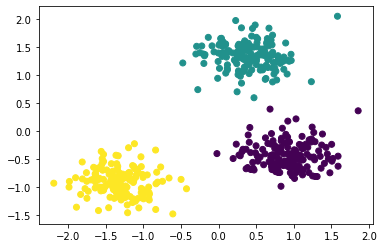

In [6]:
scaled_x = scaled_features_df[0]
scaled_y = scaled_features_df[1]
color_def = true_labels
plt.scatter(x=scaled_x, y=scaled_y, c=color_def)
plt.show()

### 3\.  Create an elbow curve for the data with k ranging from 1 to 11

Hint: use intertia_ computed by Kmeans for the y-axis

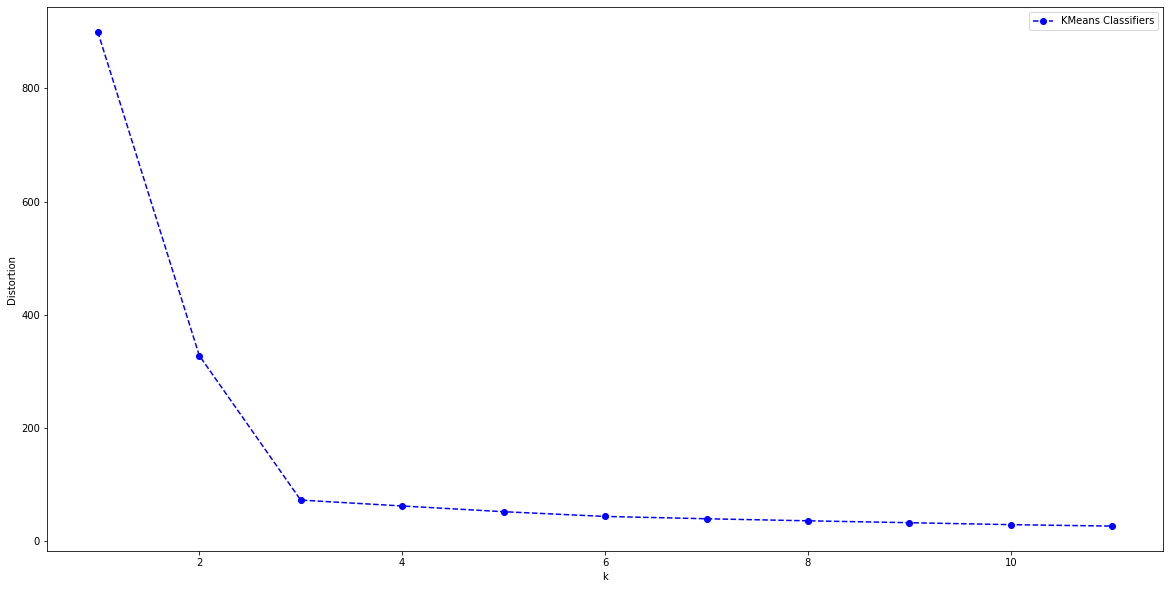

In [7]:
elbow_x = list(range(1,12))
elbow_y = []

for i in elbow_x:
  kmeans_classify = KMeans(n_clusters=i,random_state=0).fit(scaled_features_df, true_labels)
  elbow_y.append(kmeans_classify.inertia_)

plt.figure(figsize=(20,10))
plt.plot(elbow_x,elbow_y, '--bo', label='KMeans Classifiers')
plt.xlabel("k")
plt.ylabel("Distortion")
plt.legend()
plt.show()


### 4\. Run the kmeans algorithm on the data using k = 3

In [8]:
kmeans_classfit = KMeans(n_clusters=3, random_state=0).fit(scaled_features_df, true_labels)
kmeans_predict = kmeans_classfit.predict(scaled_features_df)
kmeans_df = pd.DataFrame(kmeans_predict)

### 5\. Create a scatter plot of the predictions, where the data points belonging to each predicted cluster are plotted in a different color

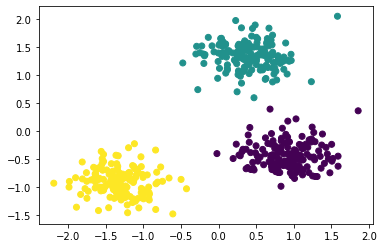

In [9]:
scaled_x = scaled_features_df[0]
scaled_y = scaled_features_df[1]
color_def = kmeans_df
plt.scatter(x=scaled_x, y=scaled_y, c=color_def)
plt.show()

## Section 2: Density-Based Clustering

In [10]:
# creating features for dbscan clustering
features, true_labels = make_moons(n_samples = 450, noise = 0.05, random_state = 100)
features = pd.DataFrame(features)
features.head(3)

,0,1
0,-0.941722,0.287927
1,1.837622,0.002209
2,0.771527,-0.496647


In [11]:
# cluster labels
true_labels

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

### 1\. Use standard scaling on the data and convert to a data frame

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features)

### 2\. Create a scatter plot of the data, using a different color for the data points that belong to each cluster

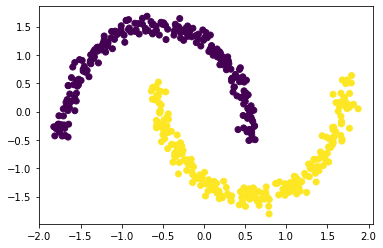

In [15]:
scaled_x = scaled_features_df[0]
scaled_y = scaled_features_df[1]
color_def = true_labels
plt.scatter(x=scaled_x, y=scaled_y, c=color_def)
plt.show()

### 3\. Apply Kmeans with k = 2 to the dataset

In [16]:
kmeans_classfit = KMeans(n_clusters=2, random_state=0).fit(scaled_features_df, true_labels)
kmeans_predict = kmeans_classfit.predict(scaled_features_df)
kmeans_df = pd.DataFrame(kmeans_predict)

### 4\. Create a scatter plot of the predictions, where the data points belonging to each predicted cluster are plotted in a different color

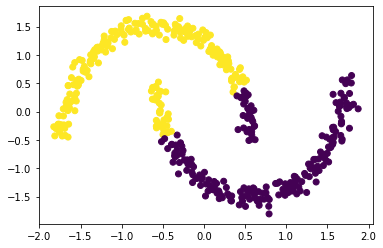

In [17]:
scaled_x = scaled_features_df[0]
scaled_y = scaled_features_df[1]
color_def = kmeans_df
plt.scatter(x=scaled_x, y=scaled_y, c=color_def)
plt.show()

### 5\. Apply DBSCAN to the dataset with parameters eps = 0.25 and min_samples = 5

### 6\. Create a scatter plot of the predictions, where the data points belonging to each predicted cluster are plotted in a different color

In [18]:
dbscan_classfit = DBSCAN(eps=0.25,min_samples=5).fit(scaled_features_df)

### 7\.  What are your observations about how the outputs of kmeans and dbscan differ?

## Section 3: Hierarchical Clustering

In [19]:
# creating a dataset for hierarchical clustering
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])

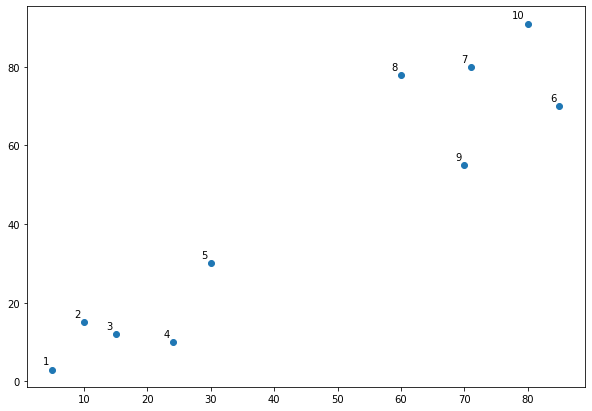

In [20]:
# plotting the dataset
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]): plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

### 1\.  Plot the dendogram for the data using a linkage type of 'single' as shown below

The libraries dendrogram and linkage were already imported during setup at the beginning of this notebook - please review their documentation online.

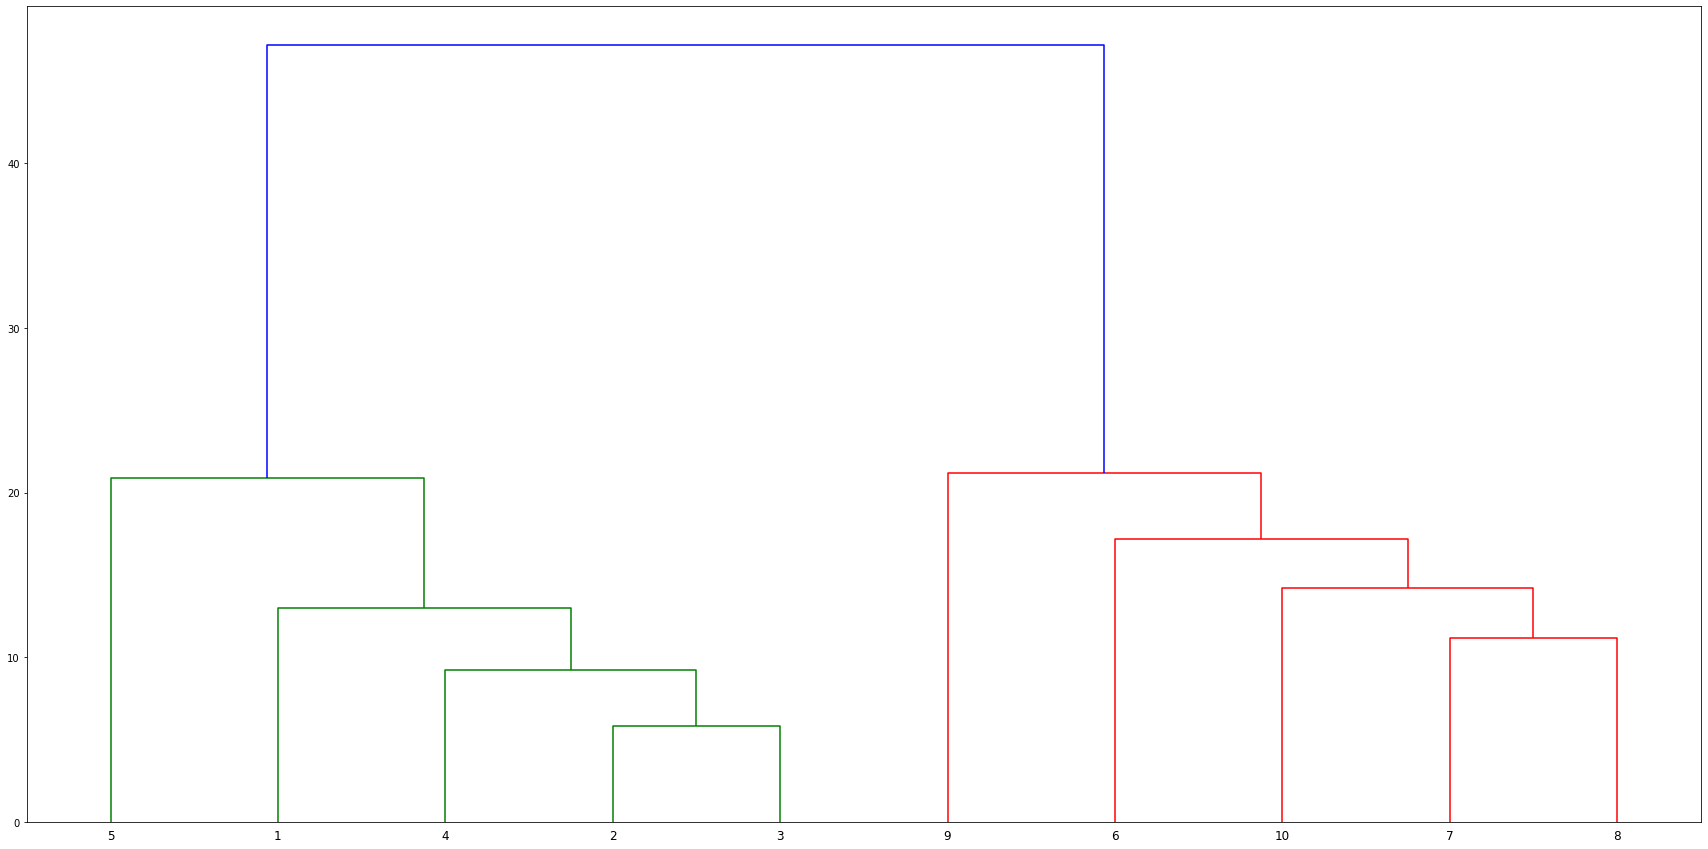

In [21]:
Z = linkage(X,'single')
fig = plt.figure(figsize=(30,15))
dn = dendrogram(Z,labels=labels)
plt.show()